**REMEMBER TO UPLOAD ZIPS TO FILES FIRST**

In [3]:
!pip install torchsummary

import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import torch                    # Pytorch module
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
from torchsummary import summary              # for getting the summary of our model

%matplotlib inline


In [4]:
## to upload test zip file.

from zipfile import ZipFile
file_name = "/content/test.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done.')


## to upload train zip file.

from zipfile import ZipFile
file_name = "/content/train.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done again.')

Done.
Done again.


In [5]:
# setting up our data dictionaries.

# data_dir = "/content/PROJ3"
# train_dir = data_dir + "/Train"
test_dir = "/content/test"
train_dir = "/content/train"
#test_dir = data_dir + "/Test"

diseases = os.listdir(train_dir)

In [6]:
print(diseases)

['Apple_leaf___Scab', 'Corn_leaf___Gray_spot', 'Apple_leaf___rust', 'grape_leaf___black_rot', 'Bell_pepper_leaf___spot', 'Tomato_leaf___mosaic_virus', 'Strawberry_leaf___healthy', 'Peach_leaf___healthy', 'Squash_leaf___Powdery_mildew', 'Potato_leaf___late_blight', 'Tomato_leaf___yellow_virus', 'Raspberry_leaf___healthy', 'Potato_leaf___early_blight', 'Corn_leaf___rust', 'Tomato_leaf___two_spotted_spider_mites', 'Bell_pepper_leaf___healthy', 'Apple_leaf___healthy', 'Corn_leaf___blight', 'Tomato_leaf___Septoria_spot', 'Tomato_leaf___mold', 'Soybean_leaf___healthy', 'Tomato_leaf___healthy', 'grape_leaf_healthy', 'Tomato_leaf___bacterial_spot', '.DS_Store', 'Cherry_leaf___healthy', 'Blueberry_leaf_healthy', 'Tomato_leaf___late_blight', 'Tomato_leaf___Early_blight']


In [7]:
indices = [1, 2, 3, 4, 7, 9, 10, 11, 14, 15, 16, 19, 20, 21, 24]

# Assign the list comprehension result to new_diseases
new_diseases = [diseases[i] for i in indices]


# Print the new_diseases list
print(new_diseases)
print("Total disease classes are: {}".format(len(diseases)))

plants = []
NumberOfDiseases = 0
for plant in new_diseases:
    parts = plant.split('___')  # Split the plant string
    if len(parts) > 0 and parts[0] not in plants: # Check if there's at least one element before accessing it
        plants.append(parts[0])
    if len(parts) > 1 and parts[1] != 'healthy': # Check if there's a second element before accessing it
        NumberOfDiseases += 1


# unique plants in the dataset
print(f"Unique Plants are: \n{plants}")

['Corn_leaf___Gray_spot', 'Apple_leaf___rust', 'grape_leaf___black_rot', 'Bell_pepper_leaf___spot', 'Peach_leaf___healthy', 'Potato_leaf___late_blight', 'Tomato_leaf___yellow_virus', 'Raspberry_leaf___healthy', 'Tomato_leaf___two_spotted_spider_mites', 'Bell_pepper_leaf___healthy', 'Apple_leaf___healthy', 'Tomato_leaf___mold', 'Soybean_leaf___healthy', 'Tomato_leaf___healthy', '.DS_Store']
Total disease classes are: 29
Unique Plants are: 
['Corn_leaf', 'Apple_leaf', 'grape_leaf', 'Bell_pepper_leaf', 'Peach_leaf', 'Potato_leaf', 'Tomato_leaf', 'Raspberry_leaf', 'Soybean_leaf', '.DS_Store']


In [8]:
print("Number of plants: {}".format(len(plants)))

print("Number of diseases: {}".format(NumberOfDiseases))

Number of plants: 10
Number of diseases: 8


In [9]:
# Number of images for each disease
nums = {}
for disease in diseases:
    disease_path = os.path.join(train_dir, disease)
    if os.path.isdir(disease_path):  # Checking if it's actually a directory (had some issues with DStore metadata folder being added)
        nums[disease] = len(os.listdir(disease_path))

# converting the nums dictionary to pandas dataframe
img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

no. of images
Apple_leaf___Scab                                  82
Corn_leaf___Gray_spot                              63
Apple_leaf___rust                                  78
grape_leaf___black_rot                             56
Bell_pepper_leaf___spot                            62
Tomato_leaf___mosaic_virus                         44
Strawberry_leaf___healthy                          88
Peach_leaf___healthy                              101
Squash_leaf___Powdery_mildew                      124
Potato_leaf___late_blight                          97
Tomato_leaf___yellow_virus                         70
Raspberry_leaf___healthy                          111
Potato_leaf___early_blight                        108
Corn_leaf___rust                                  106
Tomato_leaf___two_spotted_spider_mites              2
Bell_pepper_leaf___healthy                         53
Apple_leaf___healthy                               82
Corn_leaf___blight                                179
Tomato_leaf___Septoria_spot                       140
Tomato_leaf___mold                                 85
Soybean_leaf___healthy                             57
Tomato_leaf___healthy                              54
grape_leaf_healthy                                 57
Tomato_leaf___bacterial_spot                      101
Cherry_leaf___healthy                              47
Blueberry_leaf_healthy                            104
Tomato_leaf___late_blight                         101
Tomato_leaf___Early_blight                         78

Text(0.5, 1.0, 'Images per each class of plant disease')

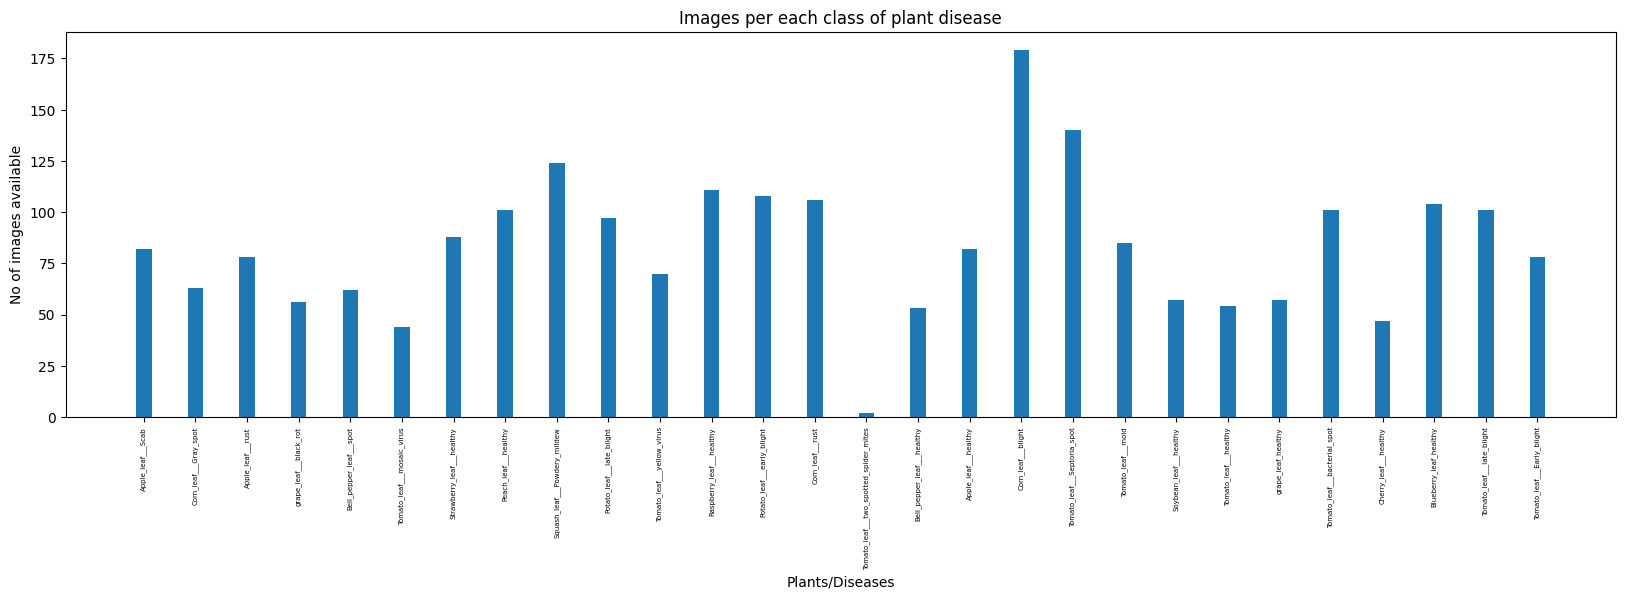

In [10]:
# plotting number of images available for each disease
# index = [n for n in range(38)] # This creates a list of 38 elements
plt.figure(figsize=(20, 5))
plt.bar(nums.keys(), nums.values(), width=0.3) # Use keys and values directly
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(range(len(nums)), nums.keys(), fontsize=5, rotation=90) # Use range based on num keys
plt.title('Images per each class of plant disease')

In [11]:
n_train = 0
for value in nums.values():
    n_train += value
print(f"There are {n_train} images for training.")

There are 2330 images for training.


In [12]:
from torchvision import transforms

# Define a transform that resizes all images to the same dimensions
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Choose dimensions that work for your model
    transforms.ToTensor(),
    # Add any other transformations you need
])

test = ImageFolder(test_dir, transform=transform) # Apply transform here
train = ImageFolder(train_dir, transform=transform) # Apply transform here

In [13]:
import os
import shutil

# Remove the .ipynb_checkpoints directory
checkpoint_dir = os.path.join(test_dir, '.ipynb_checkpoints')
if os.path.exists(checkpoint_dir):
    shutil.rmtree(checkpoint_dir)

checkpoint_dir = os.path.join(train_dir, '.ipynb_checkpoints')
if os.path.exists(checkpoint_dir):
    shutil.rmtree(checkpoint_dir)


In [14]:
import cv2

img_train = []
label_train = []

directory = "/content/train"

for crop_folder in os.listdir(directory):
    # Skip .DS_Store file
    if crop_folder == ".DS_Store":
        continue

    sub_direct = os.path.join(directory, crop_folder)
    crop_type = crop_folder.split()[0]

    for filename in os.listdir(sub_direct):
        file = os.path.join(sub_direct, filename)
        if os.path.isfile(file):
          img = cv2.imread(file)
        # Resize image to (128, 128)
        try:
            img_resized = cv2.resize(img, (1400, 1000), interpolation=cv2.INTER_AREA)
        except:
            print(file, " - failed")
        # Convert image to grayscale
        img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
        img_train.append(img_gray)
        img_train.append(file)
        label_train.append(crop_type)
        if os.path.isdir(disease_path):  # Checking if it's actually a directory (had some issues with DStore metadata folder being added)
          nums[disease] = len(os.listdir(disease_path))

/content/train/Apple_leaf___Scab/1528657579.jpg  - failed
/content/train/grape_leaf___black_rot/image_original_1495058317.jpg  - failed
/content/train/grape_leaf___black_rot/IMG_0830_original_1472588083.jpg  - failed
/content/train/Apple_leaf___healthy/apple-tree-branch-blossom-plant-fruit-928225.jpg  - failed
/content/train/Tomato_leaf___Septoria_spot/TomatoDisease_IMG_2744_2016Jul01_original_1472858324.jpg  - failed
/content/train/grape_leaf_healthy/nature-plant-grape-vine-556232.jpg  - failed
/content/train/Tomato_leaf___bacterial_spot/Tomato2_original_1472597932.jpg  - failed
/content/train/Cherry_leaf___healthy/tree-branch-blossom-plant-fruit-berry-leaf-flower-ripe-913933.jpg  - failed
/content/train/Blueberry_leaf_healthy/Blueberry_Damage_2_original_1431126657.jpg  - failed


In [15]:
img, label = train[0]
print(img.shape, label)

torch.Size([3, 224, 224]) 0


In [16]:
# for checking some images from training dataset
def show_image(image, label):
    print("Label :" + train.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))

Label :Apple_leaf___Scab(0)


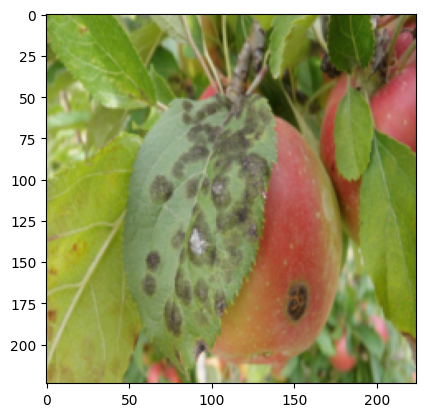

In [17]:
show_image(*train[0]) # diseased apple leaf.

Label :Apple_leaf___healthy(1)


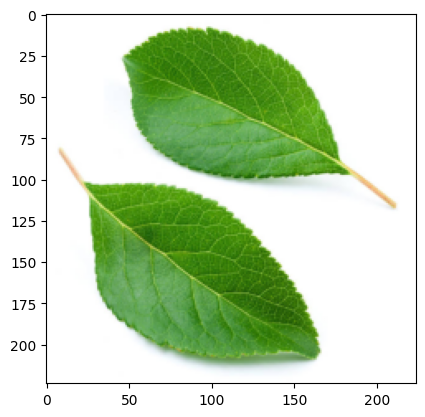

In [18]:
show_image(*train[130]) # dislaying what a healthy leaf would look like.

Label :Potato_leaf___early_blight(11)


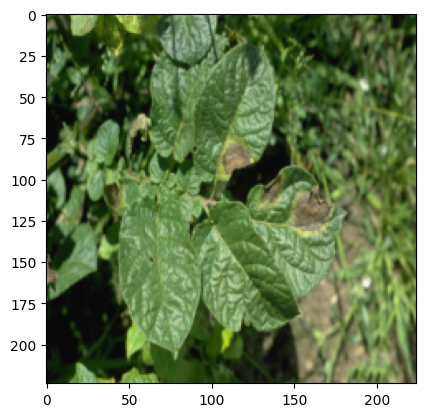

In [19]:
show_image(*train[970])

Label :Strawberry_leaf___healthy(16)


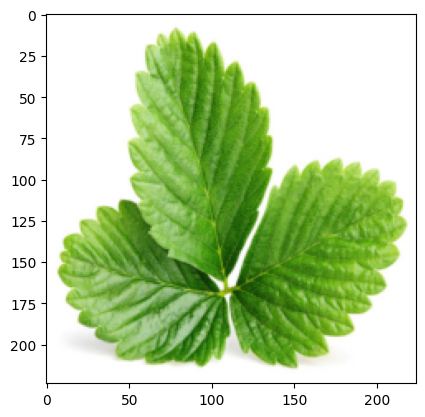

In [20]:
show_image(*train[1500])

# Moving into actual model building here.

In [21]:
# Setting the seed value.
random_seed = 7
torch.manual_seed(random_seed)

# setting the batch size
batch_size = 32

# DataLoaders for training and validation
train_dl = DataLoader(train, batch_size, shuffle=True, num_workers=2, pin_memory=True)
test_dl = DataLoader(test, batch_size, num_workers=2, pin_memory=True)


In [22]:
# helper function to show a batch of training instances
def show_batch(data):
    for images, labels in data:
        # Resize images to a common size
        resized_images = [transforms.Resize((224, 224))(img) for img in images]

        fig, ax = plt.subplots(figsize=(30, 30))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(resized_images, nrow=8).permute(1, 2, 0))
        break

## can change the 2 to match the numebr of cores that we're using.

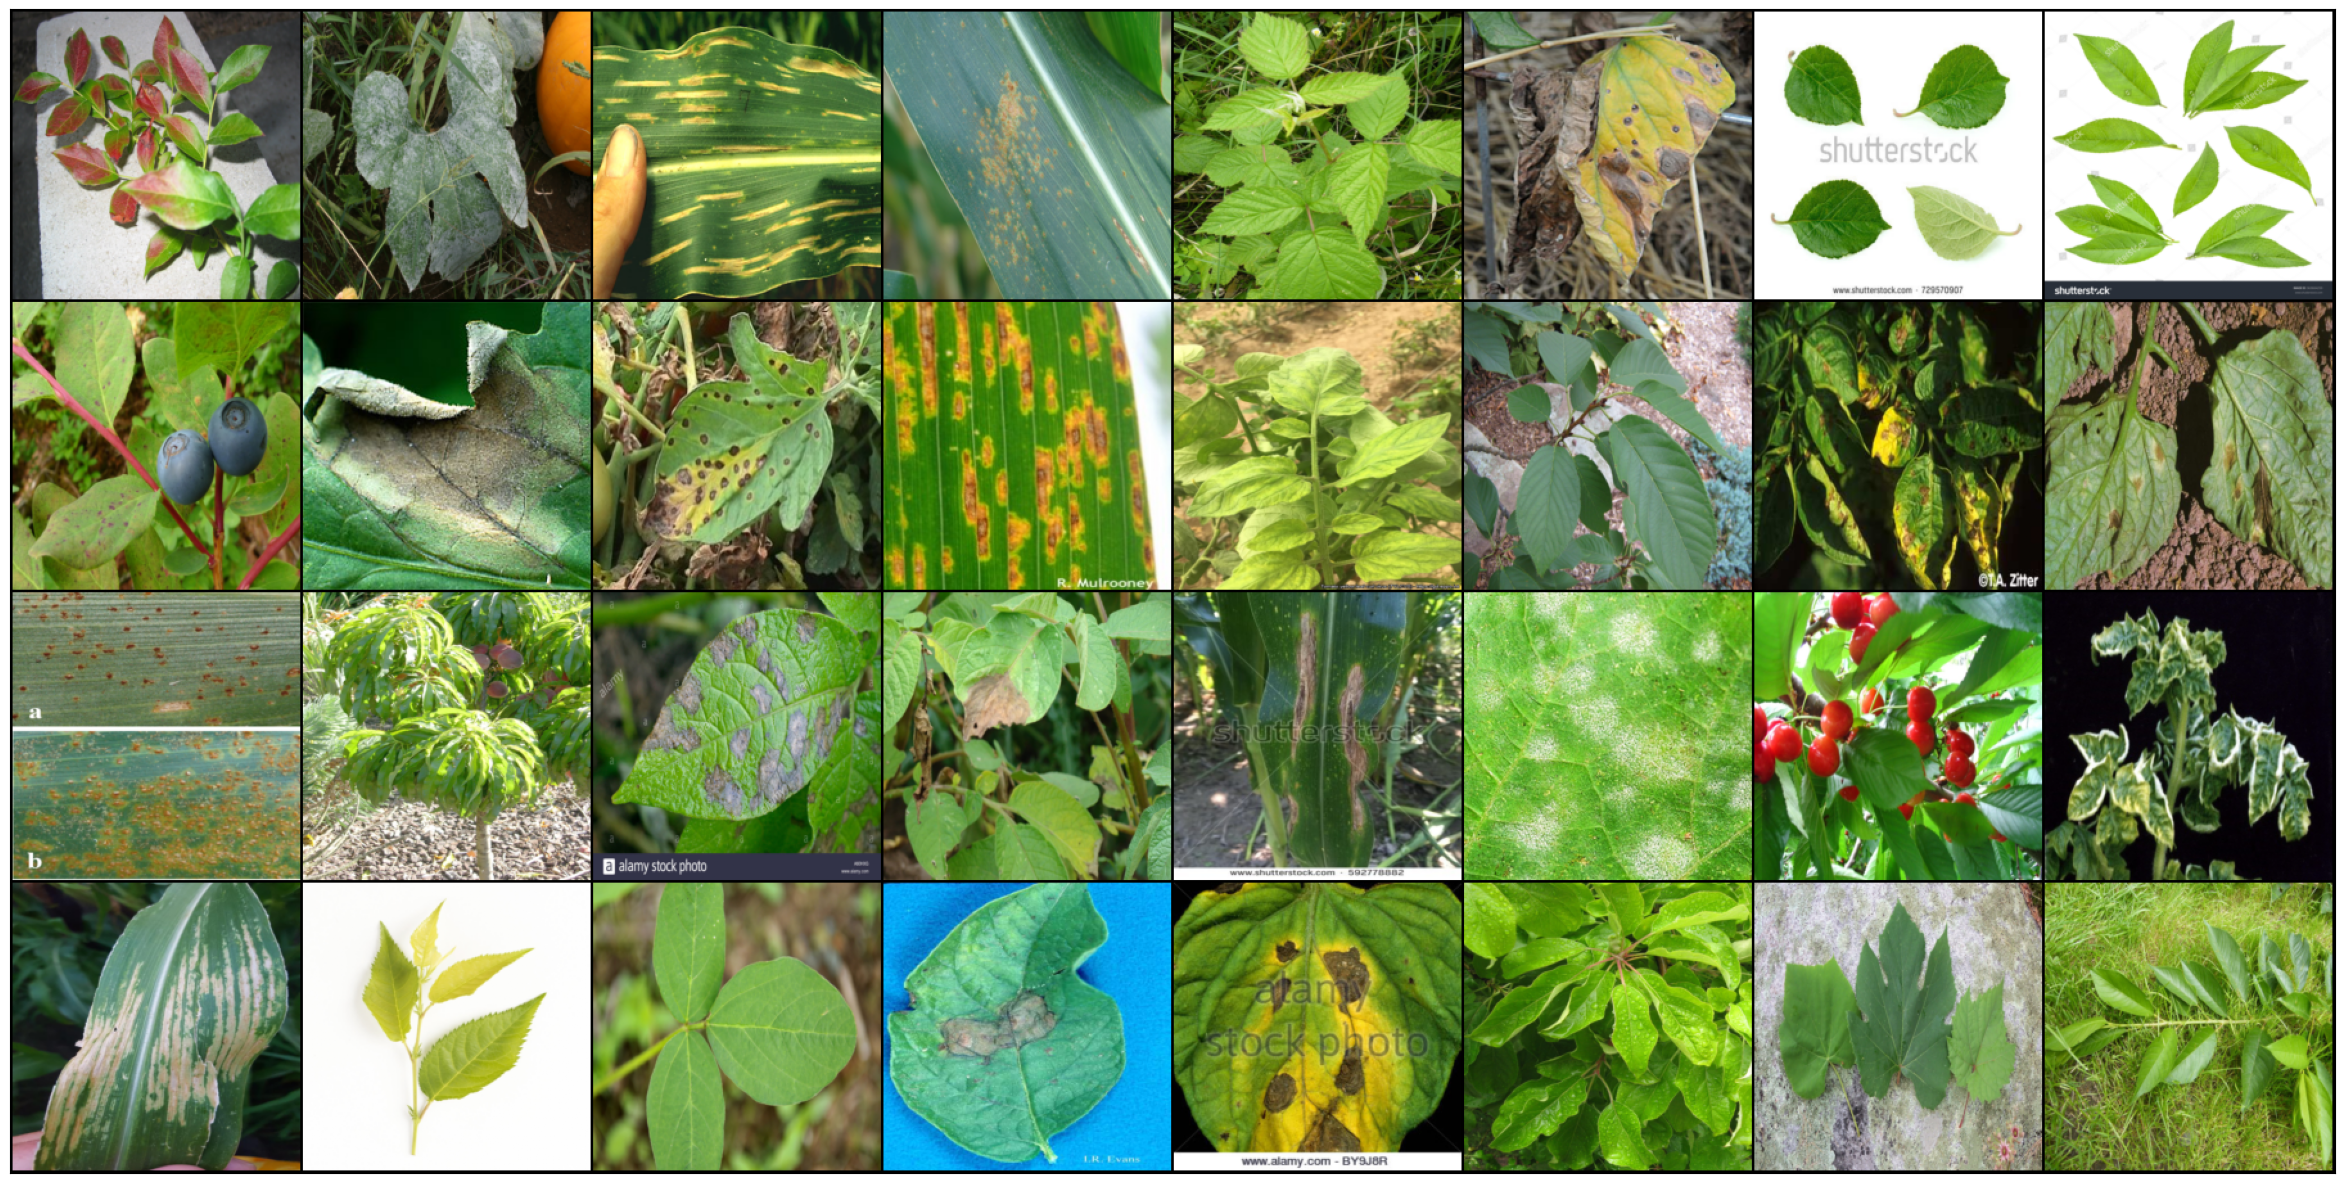

In [23]:
show_batch(train_dl)

In [24]:
import os
import subprocess
import multiprocessing
import numpy as np
from joblib import Parallel, delayed
import time

def get_available_cores():
    """ Detect the number of available CPU cores on Rivanna. Returns # of cores allocated to the job or available on the system. """
    # First check SLURM environment variables (if running as a job)
    if 'SLURM_CPUS_PER_TASK' in os.environ:
        return int(os.environ['SLURM_CPUS_PER_TASK'])
    elif 'SLURM_NTASKS' in os.environ:
        return int(os.environ['SLURM_NTASKS'])

    # If not in SLURM or as fallback, use multiprocessing
    return multiprocessing.cpu_count()

def parallel_process(function, items_list, n_jobs=None, verbose=1):
    if n_jobs is None:
        n_jobs = get_available_cores()

    print(f"Running {len(items_list)} tasks on {n_jobs} cores...")
    start_time = time.time()

    results = Parallel(n_jobs=n_jobs, verbose=verbose)(
        delayed(function)(item) for item in items_list
    )

    end_time = time.time()
    print(f"Completed in {end_time - start_time:.2f} seconds")

    return results

def submit_slurm_job(script_path, job_name, n_cores=4, mem_per_cpu="4G",
                     time_limit="02:00:00", partition="standard",
                     output_file="slurm_%j.out"):
    cmd = [
        "sbatch",
        f"--job-name={job_name}",
        f"--cpus-per-task={n_cores}",
        f"--mem-per-cpu={mem_per_cpu}",
        f"--time={time_limit}",
        f"--partition={partition}",
        f"--output={output_file}",
        script_path
    ]

    result = subprocess.run(cmd, capture_output=True, text=True)

    if result.returncode == 0:
        # Extract job ID from output (typically "Submitted batch job 123456")
        job_id = result.stdout.strip().split()[-1]
        print(f"Job submitted with ID: {job_id}")
        return job_id
    else:
        print(f"Error submitting job: {result.stderr}")
        return None

def batch_process_with_numpy(data, processing_func, batch_size=1000):
    results = []
    total_items = len(data)

    for i in range(0, total_items, batch_size):
        batch = data[i:min(i + batch_size, total_items)]
        batch_result = processing_func(batch)
        results.append(batch_result)

        print(f"Processed batch {i//batch_size + 1}/{(total_items-1)//batch_size + 1}")

    return results

def create_slurm_script(script_file, commands, modules=None, conda_env=None):
    with open(script_file, 'w') as f:
        f.write("#!/bin/bash\n\n")

        if modules:
            for module in modules:
                f.write(f"module load {module}\n")
            f.write("\n")

        if conda_env:
            f.write(f"source activate {conda_env}\n\n")

        for cmd in commands:
            f.write(f"{cmd}\n")

    # Make the script executable
    os.chmod(script_file, 0o755)
    print(f"Created SLURM script: {script_file}")

# Model = here!

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import models, transforms
import time
import copy
import matplotlib.pyplot as plt
import numpy as np
import os
from torchvision.datasets import ImageFolder
from PIL import UnidentifiedImageError
import torch


class RobustImageFolder(ImageFolder):
    def __getitem__(self, idx):
        try:
            return super().__getitem__(idx)
        except (UnidentifiedImageError, OSError) as e:
            print(f"Error loading image at index {idx}: {e}")
            if len(self) > 1:
                new_idx = (idx + 1) % len(self)
                print(f"Trying alternate image at index {new_idx}")
                return self.__getitem__(new_idx)
            else:
                print("Creating blank placeholder image")
                placeholder = torch.zeros((3, 224, 224))
                return placeholder, 0

class TransformedDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, transform=None):
        self.dataset = dataset
        self.transform = transform

    def __getitem__(self, idx):
        img, label = self.dataset[idx]
        if self.transform:
          if not isinstance(img, torch.Tensor):
            img = self.transform(img)
        return img, label

    def __len__(self):
        return len(self.dataset)

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet expects 224x224 images
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.RandomAffine(0, shear=0.1, scale=(0.8, 1.2)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # ImageNet normalization
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


# Apply transforms to datasets if needed
train_dataset_transformed = TransformedDataset(train, train_transforms)
test_dataset_transformed = TransformedDataset(test, test_transforms)

# Create dataloaders with transformed datasets
batch_size = 32
num_workers = get_available_cores()
train_dl = torch.utils.data.DataLoader(train_dataset_transformed, batch_size=batch_size, shuffle=True, num_workers=get_available_cores())
test_dl = torch.utils.data.DataLoader(test_dataset_transformed, batch_size=batch_size, num_workers=get_available_cores())

# Then create your dataloaders as usual
train_loader = DataLoader(train_dl, batch_size=batch_size, shuffle=True, num_workers=num_workers)

# Checking for GPU availability.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# For knowing the number of classes
def get_num_classes(train_dl):
    if hasattr(train_dl, 'classes'):
        return len(train_dl.classes)
    # If no classes attribute is there, then we try to determine from labels
    all_labels = set()
    for _, label in train_dl:
        if isinstance(label, int):
            all_labels.add(label)
        elif isinstance(label, torch.Tensor) and label.numel() == 1:
            all_labels.add(label.item())
    return len(all_labels)

# Building the model.
def build_resnet_model(num_classes, feature_extract=False, use_pretrained=True):
    """
    Build a ResNet model for plant disease classification

    Args:
        num_classes: Number of output classes
        feature_extract: If True, only update the reshaped layer params (freeze other layers)
        use_pretrained: If True, use pre-trained weights
    """
    model = models.resnet50(weights='DEFAULT' if use_pretrained else None)

    # Freeze all parameters if we're only extracting FEATURES.
    if feature_extract:
        for param in model.parameters():
            param.requires_grad = False

    # Replace the final fully connected layer
    num_ftrs = model.fc.in_features
    model.fc = nn.Sequential(
        nn.Dropout(0.5),  # Add dropout for regularization
        nn.Linear(num_ftrs, num_classes)
    )

    return model

# Function to set parameters to be updated during training
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

# Training function
def train_model(model, dataloaders, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    # Track losses and accuracies
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward pass
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward pass and optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train' and scheduler is not None:
                scheduler.step()

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            # Store stats
            if phase == 'train':
                train_losses.append(epoch_loss)
                train_accs.append(epoch_acc.item())
            else:
                val_losses.append(epoch_loss)
                val_accs.append(epoch_acc.item())

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # Deep copy the model if it's the best so far
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:.4f}')

    # Load best model weights
    model.load_state_dict(best_model_wts)

    # Plot training and validation loss
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.legend()
    plt.title('Loss over epochs')

    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label='Training Accuracy')
    plt.plot(val_accs, label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy over epochs')

    plt.tight_layout()
    plt.savefig('training_results.png')
    plt.show()

    return model, train_losses, val_losses, train_accs, val_accs

# Function to visualize model predictions
def visualize_model(model, dataloaders, class_names, num_images=8):
    was_training = model.training
    model.eval()

    images_so_far = 0
    fig = plt.figure(figsize=(15, 8))

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//4 + 1, 4, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}\ntrue: {class_names[labels[j]]}')

                # Get the denormalized image for display
                img = inputs.cpu().data[j].permute(1, 2, 0)
                # Denormalize if necessary
                mean = torch.tensor([0.485, 0.456, 0.406])
                std = torch.tensor([0.229, 0.224, 0.225])
                img = img * std + mean
                img = torch.clamp(img, 0, 1)

                plt.imshow(img)

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    plt.tight_layout()
                    plt.savefig('model_predictions.png')
                    return

        model.train(mode=was_training)
        plt.tight_layout()
        plt.savefig('model_predictions.png')

# Save the model checkpoint
def save_model(model, filename='plant_disease_model.pth'):
    """Save the trained model to disk"""
    torch.save({
        'model_state_dict': model.state_dict(),
        'class_to_idx': train_dl.class_to_idx if hasattr(train_dl, 'class_to_idx') else None
    }, filename)
    print(f"Model saved to {filename}")

# Load a saved model
def load_model(model_path, num_classes):
    """Load a saved model from disk"""
    checkpoint = torch.load(model_path, map_location=device)
    model = build_resnet_model(num_classes)
    model.load_state_dict(checkpoint['model_state_dict'])
    model = model.to(device)
    return model, checkpoint.get('class_to_idx')

# Evaluate model on test dataset
def evaluate_model(model, test_dataloader):
    """Evaluate model performance on the test set"""
    model.eval()
    running_corrects = 0

    # Confusion matrix setup (if classes are known)
    if hasattr(test_dataloader.dataset, 'classes'):
        num_classes = len(test_dataloader.dataset.classes)
        confusion_matrix = torch.zeros(num_classes, num_classes)

    with torch.no_grad():
        for inputs, labels in test_dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            # Update confusion matrix
            if hasattr(test_dataloader.dataset, 'classes'):
                for t, p in zip(labels.view(-1), preds.view(-1)):
                    confusion_matrix[t.long(), p.long()] += 1

            running_corrects += torch.sum(preds == labels.data)

    acc = running_corrects.double() / len(test_dataloader.dataset)

    print(f'Test Accuracy: {acc:.4f}')

    if hasattr(test_dataloader.dataset, 'classes'):
        # Calculate per-class accuracy
        class_accuracy = confusion_matrix.diag() / confusion_matrix.sum(1)
        for i, acc in enumerate(class_accuracy):
            print(f'Accuracy of {test_dataloader.dataset.classes[i]}: {acc:.4f}')

        # Print confusion matrix (normalized)
        print("Confusion Matrix:")
        cm_norm = confusion_matrix / confusion_matrix.sum(1).unsqueeze(1)
        print(cm_norm)

    return acc



###



# Create a validation split if you don't have one
# Assuming train_size = 0.8, val_size = 0.2
train_size = int(0.8 * len(train_dataset_transformed))
val_size = len(train_dataset_transformed) - train_size
train_subset, val_subset = torch.utils.data.random_split(train_dataset_transformed, [train_size, val_size])

train_dataloader = torch.utils.data.DataLoader(train_subset, batch_size=batch_size, shuffle=True, num_workers=get_available_cores())
val_dataloader = torch.utils.data.DataLoader(val_subset, batch_size=batch_size, shuffle=False, num_workers=get_available_cores())

dataloaders = {
    'train': train_dataloader,
    'val': val_dataloader
}

dataset_sizes = {
    'train': len(train_subset),
    'val': len(val_subset)
}

# Get class names if available
class_names = train.classes if hasattr(train, 'classes') else None

# Count the number of classes for the model's output layer
num_classes = get_num_classes(train)
print(f"Number of classes: {num_classes}")

# Initialize the model
model = build_resnet_model(num_classes=num_classes, feature_extract=False, use_pretrained=True)
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Learning rate scheduler - reduce learning rate when validation loss plateaus
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Train the model
model, train_losses, val_losses, train_accs, val_accs = train_model(
    model, dataloaders, criterion, optimizer, exp_lr_scheduler, num_epochs=25)

# Visualize model predictions
if class_names:
    visualize_model(model, dataloaders, class_names)

# Evaluate on test set
test_acc = evaluate_model(model, test_dl)

# Save the model
save_model(model, 'plant_disease_resnet50.pth')

print("Training and evaluation complete!")

Using device: cpu
Number of classes: 28
Epoch 0/24
----------


UnidentifiedImageError: Caught UnidentifiedImageError in DataLoader worker process 1.
Original Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/worker.py", line 349, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
           ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/fetch.py", line 50, in fetch
    data = self.dataset.__getitems__(possibly_batched_index)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataset.py", line 420, in __getitems__
    return [self.dataset[self.indices[idx]] for idx in indices]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataset.py", line 420, in <listcomp>
    return [self.dataset[self.indices[idx]] for idx in indices]
            ~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-36-2b88aa9bdf9b>", line 38, in __getitem__
    img, label = self.dataset[idx]
                 ~~~~~~~~~~~~^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torchvision/datasets/folder.py", line 245, in __getitem__
    sample = self.loader(path)
             ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torchvision/datasets/folder.py", line 284, in default_loader
    return pil_loader(path)
           ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torchvision/datasets/folder.py", line 263, in pil_loader
    img = Image.open(f)
          ^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/PIL/Image.py", line 3532, in open
    raise UnidentifiedImageError(msg)
PIL.UnidentifiedImageError: cannot identify image file <_io.BufferedReader name='/content/train/Tomato_leaf___Septoria_spot/TomatoDisease_IMG_2744_2016Jul01_original_1472858324.jpg'>


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import models, transforms
import time
import copy
import matplotlib.pyplot as plt
import numpy as np
import os
from torch.utils.data import DataLoader  # Importing DataLoader

from torchvision.datasets import ImageFolder
from PIL import UnidentifiedImageError
import torch

class RobustImageFolder(ImageFolder):
    def __getitem__(self, idx):
        try:
            return super().__getitem__(idx)
        except (UnidentifiedImageError, OSError) as e:
            print(f"Error loading image at index {idx}: {e}")
            if len(self) > 1:
                new_idx = (idx + 1) % len(self)
                print(f"Trying alternate image at index {new_idx}")
                return self.__getitem__(new_idx)
            else:
                print("Creating blank placeholder image")
                placeholder = torch.zeros((3, 224, 224))
                return placeholder, 0


# Define train_dl and test_dataset here, before creating train_loader
train_dl = RobustImageFolder(train_dir, transform=train_dataset_transformed) # Defining train_dl before using it.
test_dataset = RobustImageFolder(test_dir, transform=test_dataset_transformed)

# Create dataloaders with transformed datasets
batch_size = 32
train_dl = torch.utils.data.DataLoader(train_dataset_transformed, batch_size=batch_size, shuffle=True, num_workers=num_workers) # Using the num_workers variable.
test_dl = torch.utils.data.DataLoader(test_dataset_transformed, batch_size=batch_size, num_workers=num_workers)

# ... (rest of your code) ...